In [15]:
from citipy import citipy
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [4]:
import requests
requests.__version__

'2.27.1'

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=265ec0870032b6487ca552baaf52d0a7


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=265ec0870032b6487ca552baaf52d0a7&q=Boston


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 64,
  'feels_like': 63.86,
  'temp_min': 60.67,
  'temp_max': 66.29,
  'pressure': 1014,
  'humidity': 80},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 55, 'gust': 5.01},
 'clouds': {'all': 92},
 'dt': 1663610514,
 'sys': {'type': 2,
  'id': 2019747,
  'country': 'US',
  'sunrise': 1663583303,
  'sunset': 1663627668},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(2)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | sakakah
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | naze
Processing Record 5 of Set 1 | vila
Processing Record 6 of Set 1 | pandan
Processing Record 7 of Set 1 | port moresby
Processing Record 8 of Set 1 | pochutla
Processing Record 9 of Set 1 | akdagmadeni
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | kevsala
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | quatre cocos
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | taybad
Processi

Processing Record 43 of Set 4 | upernavik
Processing Record 44 of Set 4 | banapur
Processing Record 45 of Set 4 | goure
Processing Record 46 of Set 4 | gornyy
Processing Record 47 of Set 4 | kodiak
Processing Record 48 of Set 4 | linhares
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | asau
Processing Record 1 of Set 5 | lagoa
Processing Record 2 of Set 5 | sorland
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | ostrovnoy
Processing Record 5 of Set 5 | taonan
Processing Record 6 of Set 5 | atbasar
Processing Record 7 of Set 5 | coquimbo
Processing Record 8 of Set 5 | sorong
Processing Record 9 of Set 5 | axim
Processing Record 10 of Set 5 | rivadavia
Processing Record 11 of Set 5 | wakkanai
Processing Record 12 of Set 5 | dayong
Processing Record 13 of Set 5 | panama city
Processing Record 14 of Set 5 | healesville
Processing Record 15 of Set 5 | port elizabeth
Processing Record 16 of Set 5 | bodden town
Processing Record 17 of Set 5 | 

Processing Record 34 of Set 8 | dawlatabad
Processing Record 35 of Set 8 | calama
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | tours
Processing Record 38 of Set 8 | liege
Processing Record 39 of Set 8 | chimbote
Processing Record 40 of Set 8 | portree
Processing Record 41 of Set 8 | vao
Processing Record 42 of Set 8 | loandjili
Processing Record 43 of Set 8 | samarkand
Processing Record 44 of Set 8 | iracoubo
Processing Record 45 of Set 8 | dhanera
Processing Record 46 of Set 8 | labuhan
Processing Record 47 of Set 8 | dryden
Processing Record 48 of Set 8 | beringovskiy
Processing Record 49 of Set 8 | cabedelo
Processing Record 50 of Set 8 | ossora
Processing Record 1 of Set 9 | tateyama
Processing Record 2 of Set 9 | natal
Processing Record 3 of Set 9 | taksimo
Processing Record 4 of Set 9 | katherine
Processing Record 5 of Set 9 | mersing
Processing Record 6 of Set 9 | erzin
Processing Record 7 of Set 9 | jinchang
Processing Recor

Processing Record 23 of Set 12 | baglung
Processing Record 24 of Set 12 | clarence town
Processing Record 25 of Set 12 | bagdarin
Processing Record 26 of Set 12 | leningradskiy
Processing Record 27 of Set 12 | grand gaube
Processing Record 28 of Set 12 | muroto
Processing Record 29 of Set 12 | egvekinot
Processing Record 30 of Set 12 | kirkuk
Processing Record 31 of Set 12 | mogadishu
Processing Record 32 of Set 12 | grand centre
City not found. Skipping...
Processing Record 33 of Set 12 | solnechnyy
Processing Record 34 of Set 12 | portland
Processing Record 35 of Set 12 | komatipoort
Processing Record 36 of Set 12 | aquiraz
Processing Record 37 of Set 12 | krasnoselkup
Processing Record 38 of Set 12 | bengkalis
City not found. Skipping...
Processing Record 39 of Set 12 | odweyne
Processing Record 40 of Set 12 | bonito
Processing Record 41 of Set 12 | faya
Processing Record 42 of Set 12 | gediz
Processing Record 43 of Set 12 | oranjemund
Processing Record 44 of Set 12 | khonuu
City no

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pevek,69.7008,170.3133,32.07,84,100,6.11,RU,2022-09-19 18:08:39
1,Sakakah,29.9697,40.2064,88.47,22,0,11.90,SA,2022-09-19 18:08:40
2,Isangel,-19.5500,169.2667,75.74,83,25,9.98,VU,2022-09-19 18:08:40
3,Naze,28.3667,129.4833,76.51,87,53,9.95,JP,2022-09-19 18:08:41
4,Vila,42.0304,-8.1588,68.88,68,45,3.53,PT,2022-09-19 18:08:41
5,Pandan,14.0453,124.1694,81.16,77,99,8.05,PH,2022-09-19 18:08:41
6,Port Moresby,-9.4431,147.1797,75.54,88,66,6.06,PG,2022-09-19 18:08:42
7,Pochutla,15.7432,-96.4661,81.82,72,47,6.51,MX,2022-09-19 18:08:42
8,Akdagmadeni,39.6603,35.8836,58.78,82,5,5.28,TR,2022-09-19 18:08:43
9,Provideniya,64.3833,-173.3000,40.91,80,100,3.42,RU,2022-09-19 18:08:43


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pevek,RU,2022-09-19 18:08:39,69.7008,170.3133,32.07,84,100,6.11
1,Sakakah,SA,2022-09-19 18:08:40,29.9697,40.2064,88.47,22,0,11.90
2,Isangel,VU,2022-09-19 18:08:40,-19.5500,169.2667,75.74,83,25,9.98
3,Naze,JP,2022-09-19 18:08:41,28.3667,129.4833,76.51,87,53,9.95
4,Vila,PT,2022-09-19 18:08:41,42.0304,-8.1588,68.88,68,45,3.53
...,...,...,...,...,...,...,...,...,...
581,Marion,US,2022-09-19 18:09:39,39.7684,-86.1555,80.20,80,75,10.36
582,Adrar,MR,2022-09-19 18:13:44,20.5022,-10.0711,95.68,21,61,9.40
583,Talcahuano,CL,2022-09-19 18:13:45,-36.7167,-73.1167,53.28,54,20,13.80
584,Aktas,KZ,2022-09-19 18:13:45,49.7789,72.9608,38.95,30,0,9.64


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

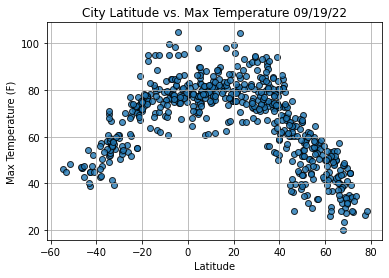

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

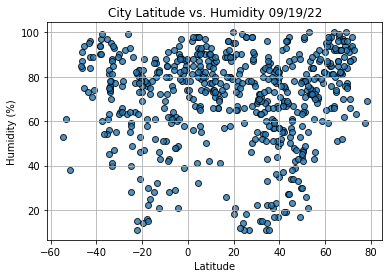

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

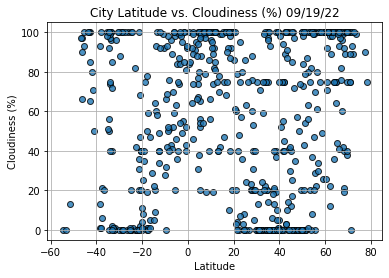

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

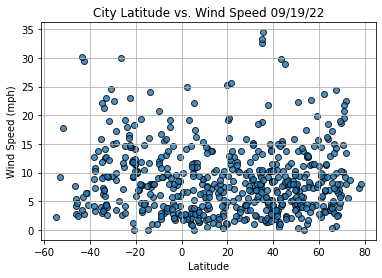

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [27]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [28]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [29]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

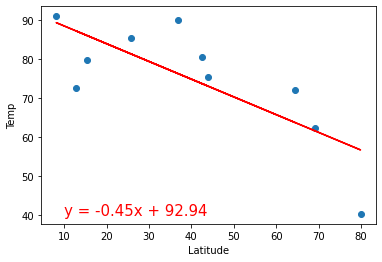

In [30]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

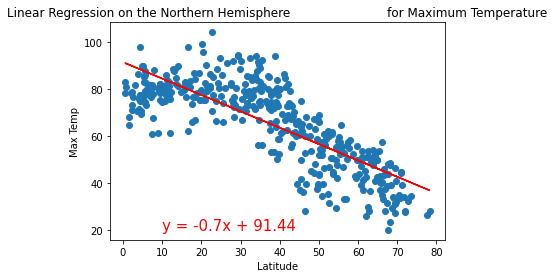

In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

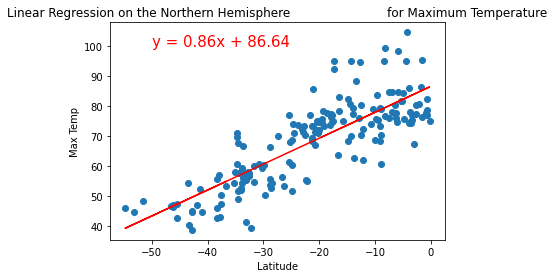

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,100))

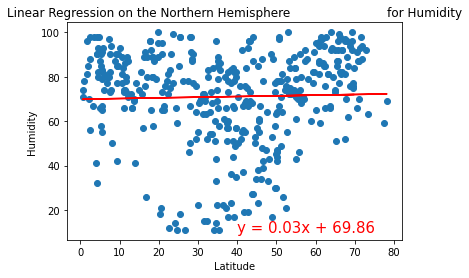

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Humidity',(40,10))

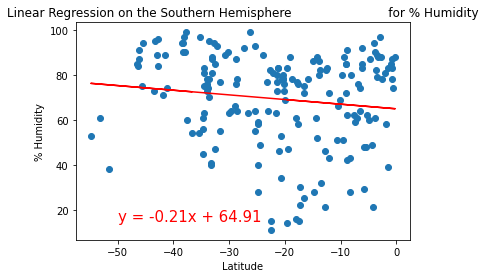

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

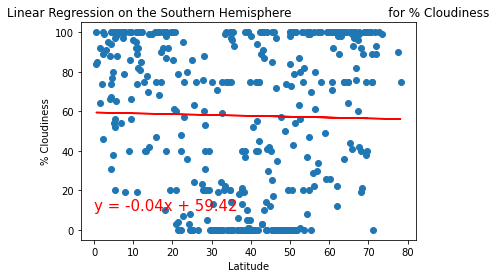

In [53]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,10))

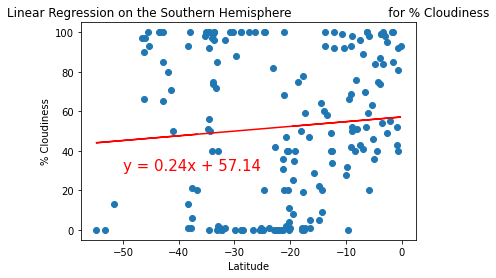

In [51]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,30))

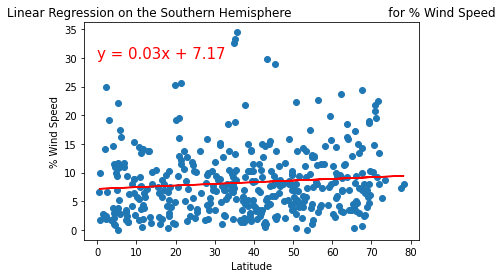

In [61]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(0,30))

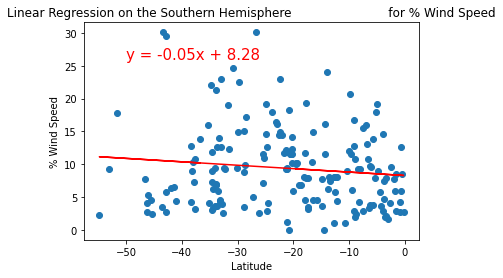

In [62]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(-50,26))